In [1]:
import pandas as pd

In [3]:
trips = pd.read_csv('Seattle_cycles_trip.csv')
stations = pd.read_csv('Seattle_cycles_station.csv')
weather = pd.read_csv('Seattle_weather_daily.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_7164\6323778.py:1: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  trips = pd.read_csv('Seattle_cycles_trip.csv')


In [4]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   trip_id            286858 non-null  int64  
 1   starttime          286858 non-null  object 
 2   stoptime           286858 non-null  object 
 3   bikeid             286858 non-null  object 
 4   tripduration       286858 non-null  float64
 5   from_station_name  286858 non-null  object 
 6   to_station_name    286858 non-null  object 
 7   from_station_id    286858 non-null  object 
 8   to_station_id      286858 non-null  object 
 9   usertype           286858 non-null  object 
 10  gender             181558 non-null  object 
 11  birthyear          181554 non-null  object 
dtypes: float64(1), int64(1), object(10)
memory usage: 26.3+ MB


In [5]:
trips.drop(['stoptime', 'bikeid', 'tripduration', 'to_station_name', 'to_station_id', 'usertype','gender', 'birthyear'], axis=1, inplace=True)

In [6]:
trips['starttime'] = pd.to_datetime(trips['starttime'])

In [7]:
trips['Date'] = trips['starttime'].dt.date

In [8]:
trips.head()

,trip_id,starttime,from_station_name,from_station_id,Date
0,431,2014-10-13 10:31:00,2nd Ave & Spring St,CBD-06,2014-10-13
1,432,2014-10-13 10:32:00,2nd Ave & Spring St,CBD-06,2014-10-13
2,433,2014-10-13 10:33:00,2nd Ave & Spring St,CBD-06,2014-10-13
3,434,2014-10-13 10:34:00,2nd Ave & Spring St,CBD-06,2014-10-13
4,435,2014-10-13 10:34:00,2nd Ave & Spring St,CBD-06,2014-10-13


In [9]:
trips['Date'] = pd.to_datetime(trips['Date'])

In [10]:
trips.head()

,trip_id,starttime,from_station_name,from_station_id,Date
0,431,2014-10-13 10:31:00,2nd Ave & Spring St,CBD-06,2014-10-13
1,432,2014-10-13 10:32:00,2nd Ave & Spring St,CBD-06,2014-10-13
2,433,2014-10-13 10:33:00,2nd Ave & Spring St,CBD-06,2014-10-13
3,434,2014-10-13 10:34:00,2nd Ave & Spring St,CBD-06,2014-10-13
4,435,2014-10-13 10:34:00,2nd Ave & Spring St,CBD-06,2014-10-13


In [11]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   trip_id            286858 non-null  int64         
 1   starttime          286858 non-null  datetime64[ns]
 2   from_station_name  286858 non-null  object        
 3   from_station_id    286858 non-null  object        
 4   Date               286858 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 10.9+ MB


In [12]:
trips.drop(['starttime'], axis=1, inplace=True)

In [13]:
trips.head()

,trip_id,from_station_name,from_station_id,Date
0,431,2nd Ave & Spring St,CBD-06,2014-10-13
1,432,2nd Ave & Spring St,CBD-06,2014-10-13
2,433,2nd Ave & Spring St,CBD-06,2014-10-13
3,434,2nd Ave & Spring St,CBD-06,2014-10-13
4,435,2nd Ave & Spring St,CBD-06,2014-10-13


In [14]:
stations.head()

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
0,BT-01,3rd Ave & Broad St,47.618418,-122.350964,10/13/2014,18,NaN,18,NaN
1,BT-03,2nd Ave & Vine St,47.615829,-122.348564,10/13/2014,16,NaN,16,NaN
2,BT-04,6th Ave & Blanchard St,47.616094,-122.341102,10/13/2014,16,NaN,16,NaN
3,BT-05,2nd Ave & Blanchard St,47.613110,-122.344208,10/13/2014,14,NaN,14,NaN
4,CBD-03,7th Ave & Union St,47.610731,-122.332447,10/13/2014,20,NaN,20,NaN


In [15]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_id         58 non-null     object 
 1   name               58 non-null     object 
 2   lat                58 non-null     float64
 3   long               58 non-null     float64
 4   install_date       58 non-null     object 
 5   install_dockcount  58 non-null     int64  
 6   modification_date  17 non-null     object 
 7   current_dockcount  58 non-null     int64  
 8   decommission_date  4 non-null      object 
dtypes: float64(2), int64(2), object(5)
memory usage: 4.2+ KB


In [16]:
decommissioned = stations[stations['decommission_date'].notnull()]

In [17]:
decommissioned

,station_id,name,lat,long,install_date,install_dockcount,modification_date,current_dockcount,decommission_date
10,CD-01,12th Ave & E Yesler Way,47.602103,-122.316923,5/22/2015,16,8/9/2016,0,8/9/2016
26,FH-01,Frye Art Museum / Terry Ave & Columbia St,47.607281,-122.324783,10/13/2014,16,3/18/2016,0,3/18/2016
38,SLU-18,Dexter Ave & Denny Way,47.618285,-122.342205,10/13/2014,20,11/2/2015,0,7/2/2016
46,UW-01,UW McCarty Hall / Whitman Ct,47.660268,-122.304826,10/13/2014,16,10/29/2015,0,10/29/2015


In [18]:
active_stations = stations[stations['decommission_date'].isnull()]

In [19]:
active_stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 57
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_id         54 non-null     object 
 1   name               54 non-null     object 
 2   lat                54 non-null     float64
 3   long               54 non-null     float64
 4   install_date       54 non-null     object 
 5   install_dockcount  54 non-null     int64  
 6   modification_date  13 non-null     object 
 7   current_dockcount  54 non-null     int64  
 8   decommission_date  0 non-null      object 
dtypes: float64(2), int64(2), object(5)
memory usage: 4.2+ KB


In [20]:
active_stations.drop(['lat', 'long', 'install_date', 'install_dockcount','modification_date', 'current_dockcount', 'decommission_date'], axis=1, inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_7164\83218656.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  active_stations.drop(['lat', 'long', 'install_date', 'install_dockcount','modification_date', 'current_dockcount', 'decommission_date'], axis=1, inplace=True)


In [21]:
active_stations.head()

,station_id,name
0,BT-01,3rd Ave & Broad St
1,BT-03,2nd Ave & Vine St
2,BT-04,6th Ave & Blanchard St
3,BT-05,2nd Ave & Blanchard St
4,CBD-03,7th Ave & Union St


In [22]:
weather.head()

,Date,Max_Temperature_F,Mean_Temperature_F,Min_TemperatureF,Max_Dew_Point_F,MeanDew_Point_F,Min_Dewpoint_F,Max_Humidity,Mean_Humidity,Min_Humidity,...,Mean_Sea_Level_Pressure_In,Min_Sea_Level_Pressure_In,Max_Visibility_Miles,Mean_Visibility_Miles,Min_Visibility_Miles,Max_Wind_Speed_MPH,Mean_Wind_Speed_MPH,Max_Gust_Speed_MPH,Precipitation_In,Events
0,10/13/2014,71,62.0,54,55,51,46,87,68,46,...,29.79,29.65,10,10,4,13,4,21,0.00,Rain
1,10/14/2014,63,59.0,55,52,51,50,88,78,63,...,29.75,29.54,10,9,3,10,5,17,0.11,Rain
2,10/15/2014,62,58.0,54,53,50,46,87,77,67,...,29.71,29.51,10,9,3,18,7,25,0.45,Rain
3,10/16/2014,71,61.0,52,49,46,42,83,61,36,...,29.95,29.81,10,10,10,9,4,-,0.00,Rain
4,10/17/2014,64,60.0,57,55,51,41,87,72,46,...,29.78,29.73,10,10,6,8,3,-,0.14,Rain


In [23]:
weather.drop(['Max_Temperature_F','Min_TemperatureF', 'Max_Dew_Point_F', 'MeanDew_Point_F','Min_Dewpoint_F','Max_Humidity', 'Mean_Humidity','Min_Humidity', 'Max_Sea_Level_Pressure_In', 'Mean_Sea_Level_Pressure_In','Min_Sea_Level_Pressure_In','Max_Visibility_Miles','Mean_Visibility_Miles','Min_Visibility_Miles','Max_Wind_Speed_MPH','Max_Gust_Speed_MPH'], axis=1, inplace=True)

In [24]:
weather['Date'] = pd.to_datetime(weather['Date'])

In [25]:
weather.columns = weather.columns.str.lower()

In [26]:
trips.columns = trips.columns.str.lower()

In [27]:
#trips & weather can join on date 
#stations &  can join on from_station_id & station_id 

In [28]:
trips.rename(columns = {'from_station_name': 'name', 'from_station_id' : 'station_id'}, inplace=True)

In [29]:
trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286858 entries, 0 to 286857
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   trip_id     286858 non-null  int64         
 1   name        286858 non-null  object        
 2   station_id  286858 non-null  object        
 3   date        286858 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 8.8+ MB


In [30]:
active_stations.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 0 to 57
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   station_id  54 non-null     object
 1   name        54 non-null     object
dtypes: object(2)
memory usage: 1.3+ KB


In [31]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 689 entries, 0 to 688
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 689 non-null    datetime64[ns]
 1   mean_temperature_f   688 non-null    float64       
 2   mean_wind_speed_mph  689 non-null    int64         
 3   precipitation_in     689 non-null    float64       
 4   events               328 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 27.0+ KB


In [32]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   station_id         58 non-null     object 
 1   name               58 non-null     object 
 2   lat                58 non-null     float64
 3   long               58 non-null     float64
 4   install_date       58 non-null     object 
 5   install_dockcount  58 non-null     int64  
 6   modification_date  17 non-null     object 
 7   current_dockcount  58 non-null     int64  
 8   decommission_date  4 non-null      object 
dtypes: float64(2), int64(2), object(5)
memory usage: 4.2+ KB


In [33]:
stations.drop(['lat', 'long', 'install_date', 'install_dockcount','modification_date', 'current_dockcount'], axis=1, inplace=True)

In [34]:
stations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58 entries, 0 to 57
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   station_id         58 non-null     object
 1   name               58 non-null     object
 2   decommission_date  4 non-null      object
dtypes: object(3)
memory usage: 1.5+ KB


In [35]:
trip_counts = trips.groupby(['date', 'name']).size().reset_index(name='trip_count')

In [36]:
trip_counts #with deactive stations

,date,name,trip_count
0,2014-10-13,12th Ave & E Denny Way,12
1,2014-10-13,12th Ave & E Mercer St,10
2,2014-10-13,12th Ave & NE Campus Pkwy,12
3,2014-10-13,15th Ave E & E Thomas St,22
4,2014-10-13,15th Ave NE & NE 40th St,6
...,...,...,...
32746,2016-08-31,Summit Ave E & E Republican St,11
32747,2016-08-31,Terry Ave & Stewart St,5
32748,2016-08-31,Thomas St & 5th Ave N,5
32749,2016-08-31,Union St & 4th Ave,5


In [37]:
trip_counts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32751 entries, 0 to 32750
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   date        32751 non-null  datetime64[ns]
 1   name        32751 non-null  object        
 2   trip_count  32751 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 767.7+ KB


In [38]:
#making decision on model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

<Axes: xlabel='date'>

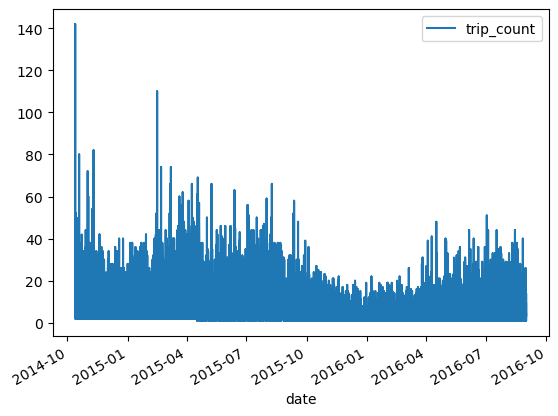

In [39]:
trip_counts.plot(kind='line', x = 'date', y='trip_count' )

In [40]:
#encoding
trip_counts = pd.get_dummies(trip_counts, columns=['name'])

In [41]:
trip_counts.head()

,date,trip_count,name_12th Ave & E Denny Way,name_12th Ave & E Mercer St,name_12th Ave & E Yesler Way,name_12th Ave & NE Campus Pkwy,name_15th Ave E & E Thomas St,name_15th Ave NE & NE 40th St,name_1st Ave & Marion St,name_2nd Ave & Blanchard St,...,name_Summit Ave & E Denny Way,name_Summit Ave E & E Republican St,name_Terry Ave & Stewart St,name_Thomas St & 5th Ave N,name_UW Engineering Library / E Stevens Way NE & Jefferson Rd,name_UW Intramural Activities Building,name_UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd,name_UW McCarty Hall / Whitman Ct,name_Union St & 4th Ave,name_Westlake Ave & 6th Ave
0,2014-10-13,12,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014-10-13,10,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014-10-13,12,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014-10-13,22,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014-10-13,6,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [42]:
trip_counts.columns

Index(['date', 'trip_count', 'name_12th Ave & E Denny Way',
       'name_12th Ave & E Mercer St', 'name_12th Ave & E Yesler Way',
       'name_12th Ave & NE Campus Pkwy', 'name_15th Ave E & E Thomas St',
       'name_15th Ave NE & NE 40th St', 'name_1st Ave & Marion St',
       'name_2nd Ave & Blanchard St', 'name_2nd Ave & Pine St',
       'name_2nd Ave & Spring St', 'name_2nd Ave & Vine St',
       'name_3rd Ave & Broad St', 'name_6th Ave & Blanchard St',
       'name_6th Ave S & S King St', 'name_7th Ave & Union St',
       'name_8D OPS 02', 'name_9th Ave N & Mercer St',
       'name_Bellevue Ave & E Pine St', 'name_Broadway and E Denny Way',
       'name_Burke Museum / E Stevens Way NE & Memorial Way NE',
       'name_Burke-Gilman Trail / NE Blakeley St & 24th Ave NE',
       'name_Cal Anderson Park / 11th Ave & Pine St',
       'name_Children's Hospital / Sandpoint Way NE & 40th Ave NE',
       'name_City Hall / 4th Ave & James St', 'name_Dexter Ave & Denny Way',
       'name_Dext

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
trip_counts.head()

,date,trip_count,name_12th Ave & E Denny Way,name_12th Ave & E Mercer St,name_12th Ave & E Yesler Way,name_12th Ave & NE Campus Pkwy,name_15th Ave E & E Thomas St,name_15th Ave NE & NE 40th St,name_1st Ave & Marion St,name_2nd Ave & Blanchard St,...,name_Summit Ave & E Denny Way,name_Summit Ave E & E Republican St,name_Terry Ave & Stewart St,name_Thomas St & 5th Ave N,name_UW Engineering Library / E Stevens Way NE & Jefferson Rd,name_UW Intramural Activities Building,name_UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd,name_UW McCarty Hall / Whitman Ct,name_Union St & 4th Ave,name_Westlake Ave & 6th Ave
0,2014-10-13,12,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2014-10-13,10,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2014-10-13,12,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2014-10-13,22,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2014-10-13,6,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
weather.head()

,date,mean_temperature_f,mean_wind_speed_mph,precipitation_in,events
0,2014-10-13,62.0,4,0.00,Rain
1,2014-10-14,59.0,5,0.11,Rain
2,2014-10-15,58.0,7,0.45,Rain
3,2014-10-16,61.0,4,0.00,Rain
4,2014-10-17,60.0,3,0.14,Rain


In [46]:
weather['events'].unique()

array(['Rain', nan, 'Rain , Snow', 'Fog', 'Fog , Rain',
       'Rain , Thunderstorm', 'Fog-Rain', 'Snow', 'Rain-Thunderstorm',
       'Rain-Snow'], dtype=object)

In [47]:
weather['event_1'] = weather['events'].str.split(r'\W+').str.get(0)
weather['event_2'] = weather['events'].str.split(r'\W+').str.get(1)

In [48]:
weather.head()

,date,mean_temperature_f,mean_wind_speed_mph,precipitation_in,events,event_1,event_2
0,2014-10-13,62.0,4,0.00,Rain,Rain,NaN
1,2014-10-14,59.0,5,0.11,Rain,Rain,NaN
2,2014-10-15,58.0,7,0.45,Rain,Rain,NaN
3,2014-10-16,61.0,4,0.00,Rain,Rain,NaN
4,2014-10-17,60.0,3,0.14,Rain,Rain,NaN


In [49]:
weather['event_2'].unique()

array([nan, 'Snow', 'Rain', 'Thunderstorm'], dtype=object)

In [50]:
weather.drop(['events'], axis=1, inplace=True)

In [51]:
trips_weather = trip_counts.merge(weather, how ='outer', on='date')

In [52]:
trips_weather.head()

,date,trip_count,name_12th Ave & E Denny Way,name_12th Ave & E Mercer St,name_12th Ave & E Yesler Way,name_12th Ave & NE Campus Pkwy,name_15th Ave E & E Thomas St,name_15th Ave NE & NE 40th St,name_1st Ave & Marion St,name_2nd Ave & Blanchard St,...,name_UW Intramural Activities Building,name_UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd,name_UW McCarty Hall / Whitman Ct,name_Union St & 4th Ave,name_Westlake Ave & 6th Ave,mean_temperature_f,mean_wind_speed_mph,precipitation_in,event_1,event_2
0,2014-10-13,12,1,0,0,0,0,0,0,0,...,0,0,0,0,0,62.0,4,0.0,Rain,NaN
1,2014-10-13,10,0,1,0,0,0,0,0,0,...,0,0,0,0,0,62.0,4,0.0,Rain,NaN
2,2014-10-13,12,0,0,0,1,0,0,0,0,...,0,0,0,0,0,62.0,4,0.0,Rain,NaN
3,2014-10-13,22,0,0,0,0,1,0,0,0,...,0,0,0,0,0,62.0,4,0.0,Rain,NaN
4,2014-10-13,6,0,0,0,0,0,1,0,0,...,0,0,0,0,0,62.0,4,0.0,Rain,NaN


In [53]:
#encoding
trips_weather = pd.get_dummies(trips_weather, columns=['event_1','event_2'])

In [54]:
trips_weather

,date,trip_count,name_12th Ave & E Denny Way,name_12th Ave & E Mercer St,name_12th Ave & E Yesler Way,name_12th Ave & NE Campus Pkwy,name_15th Ave E & E Thomas St,name_15th Ave NE & NE 40th St,name_1st Ave & Marion St,name_2nd Ave & Blanchard St,...,name_Westlake Ave & 6th Ave,mean_temperature_f,mean_wind_speed_mph,precipitation_in,event_1_Fog,event_1_Rain,event_1_Snow,event_2_Rain,event_2_Snow,event_2_Thunderstorm
0,2014-10-13,12,1,0,0,0,0,0,0,0,...,0,62.0,4,0.0,0,1,0,0,0,0
1,2014-10-13,10,0,1,0,0,0,0,0,0,...,0,62.0,4,0.0,0,1,0,0,0,0
2,2014-10-13,12,0,0,0,1,0,0,0,0,...,0,62.0,4,0.0,0,1,0,0,0,0
3,2014-10-13,22,0,0,0,0,1,0,0,0,...,0,62.0,4,0.0,0,1,0,0,0,0
4,2014-10-13,6,0,0,0,0,0,1,0,0,...,0,62.0,4,0.0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32746,2016-08-31,11,0,0,0,0,0,0,0,0,...,0,65.0,8,0.0,0,1,0,0,0,0
32747,2016-08-31,5,0,0,0,0,0,0,0,0,...,0,65.0,8,0.0,0,1,0,0,0,0
32748,2016-08-31,5,0,0,0,0,0,0,0,0,...,0,65.0,8,0.0,0,1,0,0,0,0
32749,2016-08-31,5,0,0,0,0,0,0,0,0,...,0,65.0,8,0.0,0,1,0,0,0,0


In [55]:
trips_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32751 entries, 0 to 32750
Data columns (total 72 columns):
 #   Column                                                                       Non-Null Count  Dtype         
---  ------                                                                       --------------  -----         
 0   date                                                                         32751 non-null  datetime64[ns]
 1   trip_count                                                                   32751 non-null  int64         
 2   name_12th Ave & E Denny Way                                                  32751 non-null  uint8         
 3   name_12th Ave & E Mercer St                                                  32751 non-null  uint8         
 4   name_12th Ave & E Yesler Way                                                 32751 non-null  uint8         
 5   name_12th Ave & NE Campus Pkwy                                               32751 non-null  ui

In [56]:
trips_weather['mean_temperature_f'].fillna(value=0.00, inplace=True)

In [57]:
trips_weather.columns

Index(['date', 'trip_count', 'name_12th Ave & E Denny Way',
       'name_12th Ave & E Mercer St', 'name_12th Ave & E Yesler Way',
       'name_12th Ave & NE Campus Pkwy', 'name_15th Ave E & E Thomas St',
       'name_15th Ave NE & NE 40th St', 'name_1st Ave & Marion St',
       'name_2nd Ave & Blanchard St', 'name_2nd Ave & Pine St',
       'name_2nd Ave & Spring St', 'name_2nd Ave & Vine St',
       'name_3rd Ave & Broad St', 'name_6th Ave & Blanchard St',
       'name_6th Ave S & S King St', 'name_7th Ave & Union St',
       'name_8D OPS 02', 'name_9th Ave N & Mercer St',
       'name_Bellevue Ave & E Pine St', 'name_Broadway and E Denny Way',
       'name_Burke Museum / E Stevens Way NE & Memorial Way NE',
       'name_Burke-Gilman Trail / NE Blakeley St & 24th Ave NE',
       'name_Cal Anderson Park / 11th Ave & Pine St',
       'name_Children's Hospital / Sandpoint Way NE & 40th Ave NE',
       'name_City Hall / 4th Ave & James St', 'name_Dexter Ave & Denny Way',
       'name_Dext

In [58]:
trips_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32751 entries, 0 to 32750
Data columns (total 72 columns):
 #   Column                                                                       Non-Null Count  Dtype         
---  ------                                                                       --------------  -----         
 0   date                                                                         32751 non-null  datetime64[ns]
 1   trip_count                                                                   32751 non-null  int64         
 2   name_12th Ave & E Denny Way                                                  32751 non-null  uint8         
 3   name_12th Ave & E Mercer St                                                  32751 non-null  uint8         
 4   name_12th Ave & E Yesler Way                                                 32751 non-null  uint8         
 5   name_12th Ave & NE Campus Pkwy                                               32751 non-null  ui

In [59]:
cols = [ 'name_12th Ave & E Denny Way',
       'name_12th Ave & E Mercer St', 'name_12th Ave & E Yesler Way',
       'name_12th Ave & NE Campus Pkwy', 'name_15th Ave E & E Thomas St',
       'name_15th Ave NE & NE 40th St', 'name_1st Ave & Marion St',
       'name_2nd Ave & Blanchard St', 'name_2nd Ave & Pine St',
       'name_2nd Ave & Spring St', 'name_2nd Ave & Vine St',
       'name_3rd Ave & Broad St', 'name_6th Ave & Blanchard St',
       'name_6th Ave S & S King St', 'name_7th Ave & Union St',
       'name_8D OPS 02', 'name_9th Ave N & Mercer St',
       'name_Bellevue Ave & E Pine St', 'name_Broadway and E Denny Way',
       'name_Burke Museum / E Stevens Way NE & Memorial Way NE',
       'name_Burke-Gilman Trail / NE Blakeley St & 24th Ave NE',
       'name_Cal Anderson Park / 11th Ave & Pine St',
       "name_Children's Hospital / Sandpoint Way NE & 40th Ave NE",
       'name_City Hall / 4th Ave & James St', 'name_Dexter Ave & Denny Way',
       'name_Dexter Ave N & Aloha St', 'name_E Blaine St & Fairview Ave E',
       'name_E Harrison St & Broadway Ave E', 'name_E Pine St & 16th Ave',
       'name_Eastlake Ave E & E Allison St',
       'name_Fred Hutchinson Cancer Research Center / Fairview Ave N & Ward St',
       'name_Frye Art Museum / Terry Ave & Columbia St',
       'name_Harvard Ave & E Pine St',
       'name_Key Arena / 1st Ave N & Harrison St',
       'name_King Street Station Plaza / 2nd Ave Extension S & S Jackson St',
       'name_Lake Union Park / Valley St & Boren Ave N',
       'name_Mercer St & 9th Ave N', 'name_NE 42nd St & University Way NE',
       'name_NE 47th St & 12th Ave NE', 'name_NE Pacific St/UW Medical Center',
       'name_Occidental Park / Occidental Ave S & S Washington St',
       'name_PATH / 9th Ave & Westlake Ave',
       'name_Pier 66 / Alaskan Way & Bell St',
       'name_Pier 69 / Alaskan Way & Clay St', 'name_Pine St & 9th Ave',
       'name_Pronto shop', 'name_Pronto shop 2',
       'name_REI / Yale Ave N & John St',
       'name_Republican St & Westlake Ave N',
       'name_Seattle Aquarium / Alaskan Way S & Elliott Bay Trail',
       'name_Seattle University / E Columbia St & 12th Ave',
       'name_Summit Ave & E Denny Way', 'name_Summit Ave E & E Republican St',
       'name_Terry Ave & Stewart St', 'name_Thomas St & 5th Ave N',
       'name_UW Engineering Library / E Stevens Way NE & Jefferson Rd',
       'name_UW Intramural Activities Building',
       'name_UW Magnuson Health Sciences Center Rotunda / Columbia Rd & San Juan Rd',
       'name_UW McCarty Hall / Whitman Ct', 'name_Union St & 4th Ave',
       'name_Westlake Ave & 6th Ave', 'mean_temperature_f',
       'mean_wind_speed_mph', 'precipitation_in', 'event_1_Fog',
       'event_1_Rain', 'event_1_Snow', 'event_2_Rain', 'event_2_Snow',
       'event_2_Thunderstorm']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(trips_weather[cols],
                                                    trips_weather['trip_count'],
                                                    test_size=0.30,
                                                    random_state =42)

In [61]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22925 entries, 12890 to 23654
Data columns (total 70 columns):
 #   Column                                                                       Non-Null Count  Dtype  
---  ------                                                                       --------------  -----  
 0   name_12th Ave & E Denny Way                                                  22925 non-null  uint8  
 1   name_12th Ave & E Mercer St                                                  22925 non-null  uint8  
 2   name_12th Ave & E Yesler Way                                                 22925 non-null  uint8  
 3   name_12th Ave & NE Campus Pkwy                                               22925 non-null  uint8  
 4   name_15th Ave E & E Thomas St                                                22925 non-null  uint8  
 5   name_15th Ave NE & NE 40th St                                                22925 non-null  uint8  
 6   name_1st Ave & Marion St          

In [62]:
y_pred.shape

NameError: name 'y_pred' is not defined

In [67]:
y_test
import numpy as np

In [68]:
from itertools import combinations
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
y_true = y_test

results = {}

#X_train, X_test, y_train, y_test

# Calculating the errors
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Calculting the R^2
r2 = r2_score(y_true, y_pred)

results[str(cols)] = {'RMSE':rmse,
                        'r^2': r2}


df_results = pd.DataFrame.from_dict(results, orient = 'index')
df_results.reset_index(inplace=True)
df_results.columns = ['Features','RMSE','R2']
df_results.sort_values(by='RMSE', inplace=True)

In [69]:
mae

29628274.318974257

In [70]:
mse

2.875200222928718e+18

In [71]:
rmse

1695641537.2739363

In [72]:
#y_pred.max()

In [73]:
#y_pred.min()

In [74]:
y_pred

array([ 8.30592346,  7.83784485, 10.45646667, ...,  5.17515564,
        3.43522644,  4.32458496])

In [75]:
X_test

,name_12th Ave & E Denny Way,name_12th Ave & E Mercer St,name_12th Ave & E Yesler Way,name_12th Ave & NE Campus Pkwy,name_15th Ave E & E Thomas St,name_15th Ave NE & NE 40th St,name_1st Ave & Marion St,name_2nd Ave & Blanchard St,name_2nd Ave & Pine St,name_2nd Ave & Spring St,...,name_Westlake Ave & 6th Ave,mean_temperature_f,mean_wind_speed_mph,precipitation_in,event_1_Fog,event_1_Rain,event_1_Snow,event_2_Rain,event_2_Snow,event_2_Thunderstorm
3578,0,0,0,0,0,0,0,0,0,0,...,0,34.0,2,0.00,0,0,0,0,0,0
29329,0,0,0,0,0,0,0,0,0,0,...,0,73.0,4,0.00,0,0,0,0,0,0
27957,0,0,0,0,0,0,0,0,0,0,...,0,66.0,2,0.00,0,0,0,0,0,0
14412,0,0,0,0,0,0,0,0,0,0,...,0,70.0,2,0.00,0,0,0,0,0,0
19804,0,1,0,0,0,0,0,0,0,0,...,0,52.0,9,0.55,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29791,0,0,0,0,0,0,0,0,0,0,...,0,66.0,3,0.00,0,0,0,0,0,0
4182,0,0,0,0,1,0,0,0,0,0,...,0,41.0,3,0.43,0,1,0,0,0,0
20964,1,0,0,0,0,0,0,0,0,0,...,0,38.0,1,0.07,0,1,0,0,0,0
22541,0,0,0,0,0,0,0,0,0,0,...,0,48.0,2,0.00,0,0,0,0,0,0


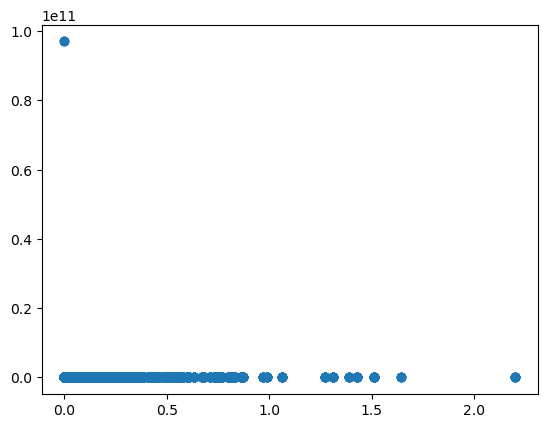

In [76]:
plt.scatter(x=X_test['precipitation_in'],y=y_pred )

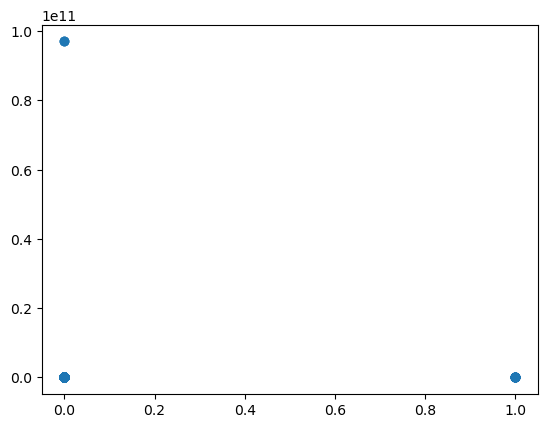

In [77]:
plt.scatter(x=X_test['event_2_Snow'],y=y_pred )

In [78]:
#plt.scatter(x=X_test['mean_temperature_f'],y=y_pred )

In [79]:
#plt.scatter(x=X_test['mean_wind_speed_mph'],y=y_pred )

In [80]:
#plt.scatter(x=X_test['event_1_Fog'],y=y_pred )

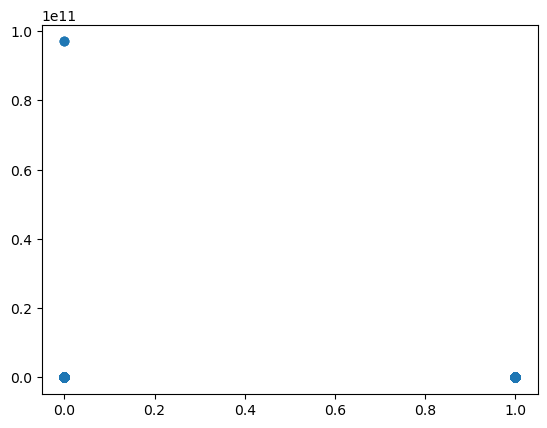

In [81]:
plt.scatter(x=X_test['name_12th Ave & E Denny Way'],y=y_pred )

In [82]:
from sklearn import tree
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import preprocessing
from sklearn import metrics 
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [83]:
# Importing Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor


# calling the decision tree method 
dt = DecisionTreeRegressor(max_depth=5,
                            min_samples_leaf=20,
                            random_state = 42)


# fitting the decision tree onto the training data
dt.fit(X_train[cols], y_train)


y_pred2 = dt.predict(X_test[cols])



In [84]:
y_pred2.size

9826

In [85]:
print(len(cols))

70


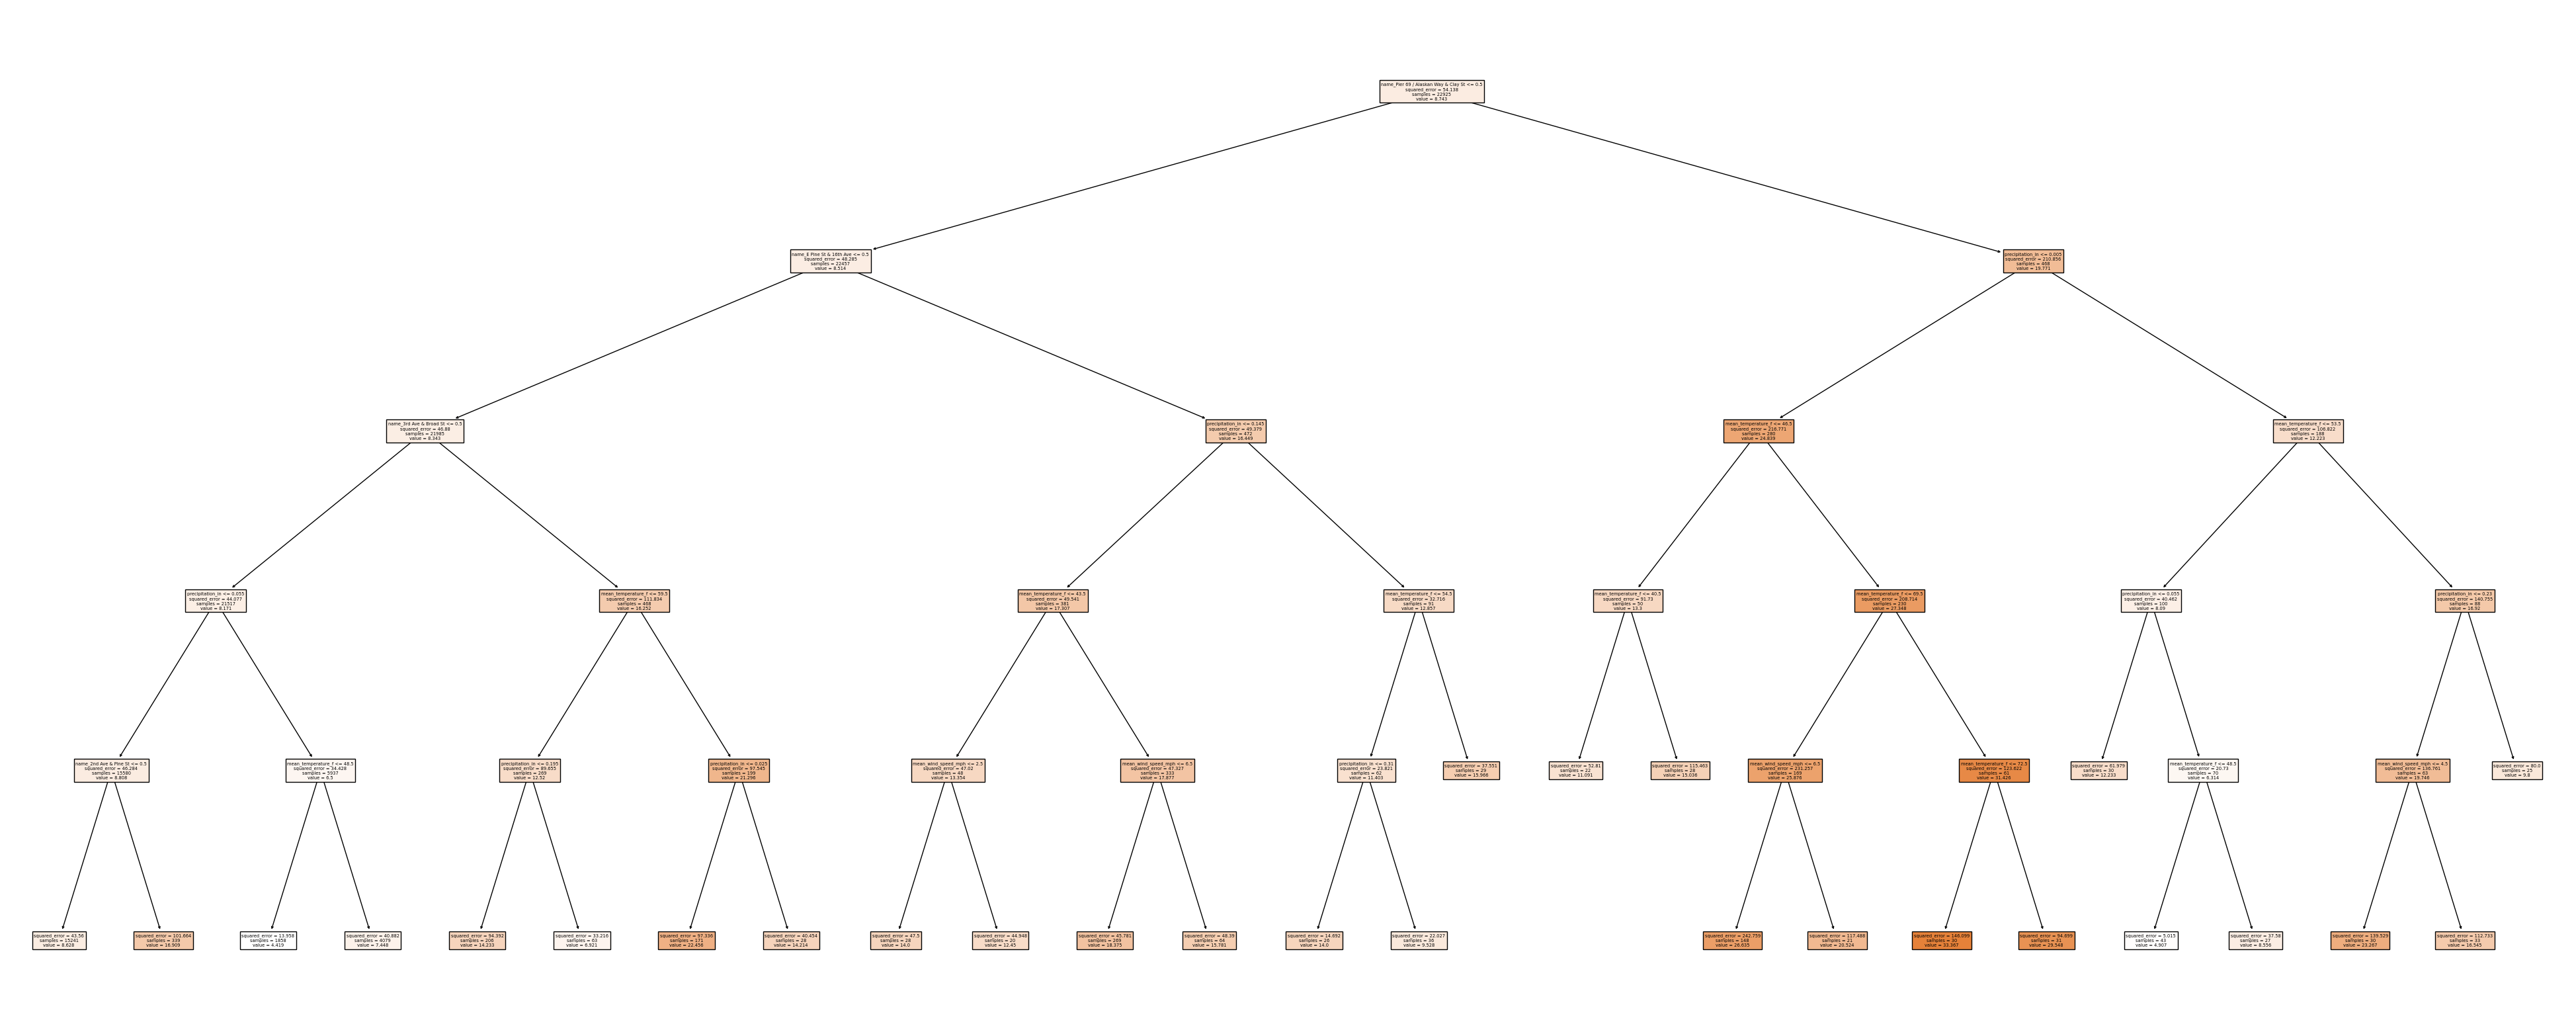

In [86]:
fig = plt.figure(figsize=(50,20))
_= tree.plot_tree(dt, feature_names=X_train[cols].columns, filled=True)

In [87]:
import graphviz
!pip install dtreeviz
import dtreeviz

     ---------------------------------------- 91.8/91.8 kB 5.1 MB/s eta 0:00:00


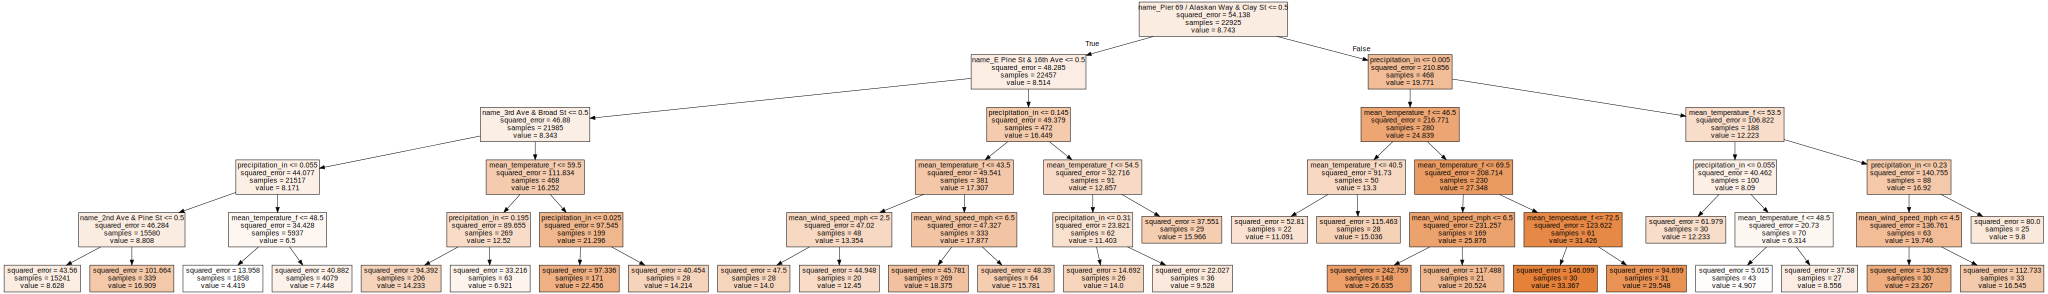

In [88]:
dot_data = tree.export_graphviz(dt,out_file=None,
                               feature_names=X_train[cols].columns,
                               filled=True)
graphviz.Source(dot_data, format='png')

In [89]:
# Calculating the errors
mae2 = mean_absolute_error(y_test, y_pred2)
mse2 = mean_squared_error(y_test, y_pred2)
rmse2 = np.sqrt(mse)

# Calculting the R^2
r22 = r2_score(y_true, y_pred2)

In [90]:
mae2

4.881550739835014

In [91]:
mse2

46.058044091926554

In [92]:
rmse2

1695641537.2739363

In [93]:
r22

0.1616060828599366

In [94]:
'''viz = dtreeviz(dt, X_train, y_train,
              target_name='trip_count',
              feature_names=X_train[cols].columns)
viz'''

"viz = dtreeviz(dt, X_train, y_train,\n              target_name='trip_count',\n              feature_names=X_train[cols].columns)\nviz"

In [95]:
trips_weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32751 entries, 0 to 32750
Data columns (total 72 columns):
 #   Column                                                                       Non-Null Count  Dtype         
---  ------                                                                       --------------  -----         
 0   date                                                                         32751 non-null  datetime64[ns]
 1   trip_count                                                                   32751 non-null  int64         
 2   name_12th Ave & E Denny Way                                                  32751 non-null  uint8         
 3   name_12th Ave & E Mercer St                                                  32751 non-null  uint8         
 4   name_12th Ave & E Yesler Way                                                 32751 non-null  uint8         
 5   name_12th Ave & NE Campus Pkwy                                               32751 non-null  ui

In [96]:
XGB model

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

#'trip_count' is the target variable (number of bike trips)
X = trips_weather.drop(['date', 'trip_count'], axis=1)
y = trips_weather['trip_count']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Convert the data to DMatrix format, which is required by XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Set up the XGBoost regressor
xgb_reg = xgb.XGBRegressor()

# Train the model
xgb_reg.fit(X_train,y_train)

# Make predictions
y_pred3 = xgb_reg.predict(dtest)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred3)
r2 = r2_score(y_test, y_pred3)
print(f'MSE: {mse}, R2: {r2}')

SyntaxError: invalid syntax (897263864.py, line 1)